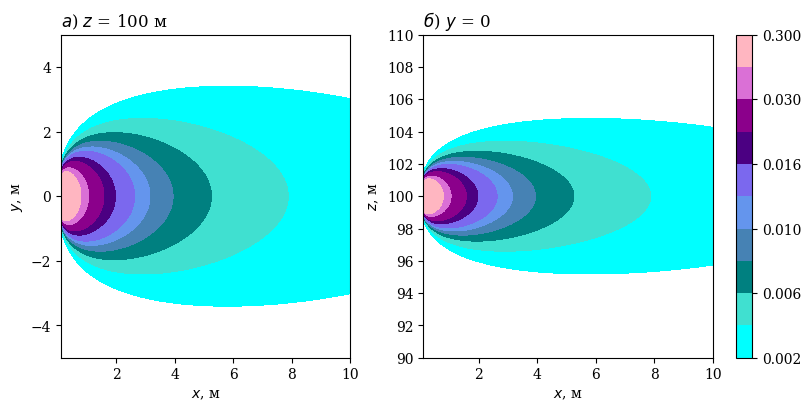

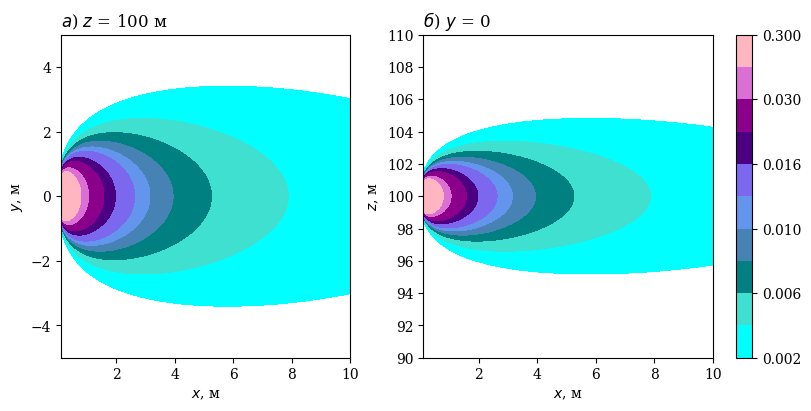

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import rc


rc('font', **{'family': 'serif'})

M = 1.4
H = 100.0
kz = 5.0
k0 = 0.5
u = 5.0
ky = k0 * u

# расчет для z = 100; горизонтальная плоскость
x, y = np.mgrid[0.1:10:100j, -5:5:100j]
z = 100

c = (M/(4 * math.pi * x * math.sqrt(ky * kz))
    * np.exp(-u * y ** 2 / (4 * ky * x))
    * (np.exp(-u * (z + H) ** 2/(4 * kz * x))+np.exp(-u * (z - H) ** 2/(4 * kz * x)))
)

# расчет для y = 0; вертикальная плоскость
x1, z1 = np.mgrid[0.1:10:100j, 90:110:100j]
y1 = 0.
c1 = (M/(4 * math.pi * x1 * math.sqrt(ky * kz))
    * np.exp(-u * y1 ** 2 / (4 * ky * x1))
    * (np.exp(-u * (z1 + H) ** 2/(4 * kz * x1))+np.exp(-u * (z1 - H) ** 2/(4 * kz * x1)))
)

# определение линий уровня и цветов
lev = [0.002, 0.004, 0.006, 0.008, 0.010, 0.012, 0.016, 0.020, 0.030, 0.040, 0.300]
clr = ['cyan', 'turquoise', 'teal', 'steelblue', 'cornflowerblue', 'mediumslateblue',
       'indigo', 'darkmagenta', 'orchid', 'lightpink', 'hotpink']

# выводим два графика рядом
fg = plt.figure(figsize=(8, 4), constrained_layout=True)
widths = [1, 1]

gs = fg.add_gridspec(ncols=2, nrows=1, width_ratios=widths)

ax1 = fg.add_subplot(gs[0, 0])
ax1.contourf(x, y, c, levels = lev, colors=clr)
ax1.set_xlabel('$x$, м')
ax1.set_ylabel('$y$, м')
ax1.set_title('$а$) $z$ = 100 м', loc='left')

ax2 = fg.add_subplot(gs[0, 1])
cf = ax2.contourf(x1, z1, c1, levels = lev, colors=clr)
ax2.set_xlabel('$x$, м')
ax2.set_ylabel('$z$, м')
ax2.set_title('$б$) $y$ = 0', loc='left')
# подписи по оси ординат - целые числа
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.colorbar(cf, ax=ax2, format='%.3f')


plt.show()
#plt.savefig('d:\Lea\Ecolog\dif_analit.png')